Import Library yang Dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Membaca file

In [ ]:
df1 = pd.read_csv('/content/Amazon Sale Report.csv', dtype={'Unnamed: 22': str}) # Data laporan penjualan amazon.

In [ ]:
# Ubah format date
df1['Date'] = pd.to_datetime(df1['Date'], format='%m-%d-%y')
df1['Status'].value_counts() #Melihat distribusi untuk kolom target
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      122103 non-null  object        
 13  Qty                 128975 no

Dengan melihat jumlah fitur yang cukup banyak untuk mendukung pemodelan prediksi status paket, dan jumlah baris data yang cukup banyak yaitu sekitar 128ribu-an maka dataset Amazon Sale Report dirasa sudah cukup memadai untuk menghasilkan model machine learning yang cukup baik nantinya. Fitur-fitur yang relevan dan dianggap sangat berguna untuk dieksplor dan dilihat adalah **Order ID, Date, Fulfilment, Sales Chanel, ship-service-level, SKU, Category, Size, Qty, Amount, ship-city, ship-state, ship-postal-code, B2B, Courier Status, dan Status.**

In [ ]:
# Membuat DataFrame baru 'df_selected' dengan kolom yang dianggap penting
dfnew = df1[['Order ID', 'Date', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'SKU', 'Category', 'Size', 'Qty', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B', 'Courier Status', 'Status']]

# Mengubah kolom Amount supaya lebih mudah dipahami menjadi Biaya Pesan (Order Price)
dfnew = dfnew.rename({'Amount' : 'Order_Price'}, axis=1)

dfnew.sample(10)

,Order ID,Date,Fulfilment,Sales Channel,ship-service-level,SKU,Category,Size,Qty,Order_Price,ship-city,ship-state,ship-postal-code,B2B,Courier Status,Status
127723,403-7193199-7435523,2022-06-01,Merchant,Amazon.in,Standard,JNE2171-KR-437-M,kurta,M,1,524.0,BENGALURU,KARNATAKA,560054.0,False,Shipped,Shipped - Delivered to Buyer
108862,405-4725453-7527510,2022-06-14,Amazon,Amazon.in,Expedited,JNE3781-KR-L,kurta,L,1,416.0,GOGUNDA,RAJASTHAN,313705.0,False,Shipped,Shipped
75565,171-3586494-3884309,2022-05-10,Amazon,Amazon.in,Expedited,J0204-TP-S,Top,S,1,749.0,NEW DELHI,DELHI,110049.0,False,Shipped,Shipped
125015,171-3827373-8019528,2022-06-03,Amazon,Amazon.in,Expedited,J0215-BL-XXL,Blouse,XXL,1,726.0,Pune,MAHARASHTRA,411028.0,False,Shipped,Shipped
107275,407-7835837-9321146,2022-06-15,Merchant,Amazon.in,Standard,J0005-DR-M,Western Dress,M,1,899.0,Bengaluru,KARNATAKA,560035.0,False,Shipped,Shipped - Delivered to Buyer
26483,406-4806619-6031530,2022-04-14,Amazon,Amazon.in,Expedited,SET197-KR-NP-L,Set,L,1,759.0,Coimbatore,TAMIL NADU,641110.0,False,Shipped,Shipped
51748,403-1937328-4381134,2022-05-29,Amazon,Amazon.in,Expedited,SET345-KR-NP-M,Set,M,1,641.0,BAREILLY,UTTAR PRADESH,243006.0,False,Shipped,Shipped
14046,403-3683403-7219540,2022-04-22,Amazon,Amazon.in,Expedited,JNE3807-KR-L,kurta,L,1,666.0,Pune,MAHARASHTRA,412105.0,False,Unshipped,Cancelled
99240,407-4627466-3215543,2022-06-22,Amazon,Amazon.in,Expedited,SET345-KR-NP-S,Set,S,1,635.0,SALEM,TAMIL NADU,636008.0,False,Shipped,Shipped
22329,171-2337474-6669925,2022-04-17,Amazon,Amazon.in,Expedited,MEN5009-KR-S,kurta,S,1,499.0,BENGALURU,KARNATAKA,560034.0,False,Shipped,Shipped


**1. Descriptive Statistics**

In [ ]:
# Memisahkan kolom numerikal dan kategorikal
nums = ['Qty', 'Order_Price']
cats = ['Fulfilment', 'Sales Channel ', 'ship-service-level', 'Category', 'Size', 'ship-state', 'B2B', 'Courier Status', 'Status']

In [ ]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Fulfilment          128975 non-null  object        
 3   Sales Channel       128975 non-null  object        
 4   ship-service-level  128975 non-null  object        
 5   SKU                 128975 non-null  object        
 6   Category            128975 non-null  object        
 7   Size                128975 non-null  object        
 8   Qty                 128975 non-null  int64         
 9   Order_Price         121180 non-null  float64       
 10  ship-city           128942 non-null  object        
 11  ship-state          128942 non-null  object        
 12  ship-postal-code    128942 non-null  float64       
 13  B2B                 128975 no

In [ ]:
dfnew[nums].describe()

,Qty,Order_Price
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


**A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?**

Berdasarkan output dari fungsi info(), tipe data kolom sudah terlihat sesuai, yaitu datetime, int64, float64, dan object. Tidak ada kolom dengan tipe data yang tidak sesuai dengan isinya. Sebagai contoh, kolom seperti Order ID, Status, dan Category menggunakan object, serta kolom numerik seperti Qty dan Amount menggunakan tipe float64. Jadi, tidak ada masalah dengan tipe data.

**B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**

Terdapat beberapa kolom yang memiliki nilai null, yaitu Courier Status, Order_Price, ship-city, ship-state, dan ship-postal-code.

**C. Apakah ada kolom yang memiliki nilai summary agak aneh (min/mean/median/max/unique/top/freq)?**

Tidak terdapat perbedaan yang signifikan antara mean dan median pada kolom Order_Price dan Qty sehingga dapat dikatakan bahwa kolom tersebut memiliki data mendekati distribusi normal. Selain itu, nilai minimum pada kolom Order_Price yang bernilai 0 juga perlu diperhatikan, karena ini mungkin menunjukkan pesanan tanpa transaksi, diskon penuh, ataupun kesalahan input.




In [ ]:
dfnew[cats].describe()

,Fulfilment,Sales Channel,ship-service-level,Category,Size,ship-state,B2B,Courier Status,Status
count,128975,128975,128975,128975,128975,128942,128975,122103,128975
unique,2,2,2,9,11,69,2,3,13
top,Amazon,Amazon.in,Expedited,Set,M,MAHARASHTRA,False,Shipped,Shipped
freq,89698,128851,88615,50284,22711,22260,128104,109487,77804


Jumlah unique values pada semua kolom kategorikal masih masuk akal, sebagai contoh untuk ship-state pengiriman terdapat 69 state. Kemudian untuk kolom target 'status' terdapat 13 jenis untuk status pengiriman pada paket yang ada. Untuk nilai yang sering muncul pada kolom Sales Channel dan B2B dengan jumlah nilai unik hanya 2 dan frekuensinya hampir mendekati jumlah baris mengindikasikan bahwa distribusi nilai terlalu timpang sehingga kemungkinan fitur tidak akan terlalu berguna dalam klasifikasi nantinya dan perlu dilakukan balance class.

**2. Univariate Analysis**

In [ ]:
# Distribusi 'Order ID' (contoh untuk melihat total unique values)
dfnew['Order ID'].nunique()

120378

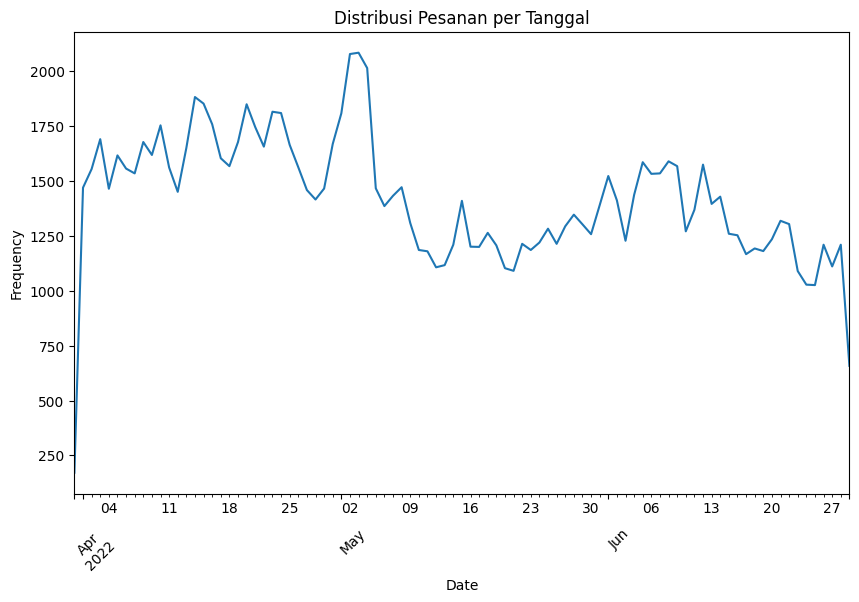

In [ ]:
# Distribusi 'Date'
plt.figure(figsize=(10, 6))
dfnew['Date'].value_counts().sort_index().plot(kind='line')
plt.title('Distribusi Pesanan per Tanggal')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

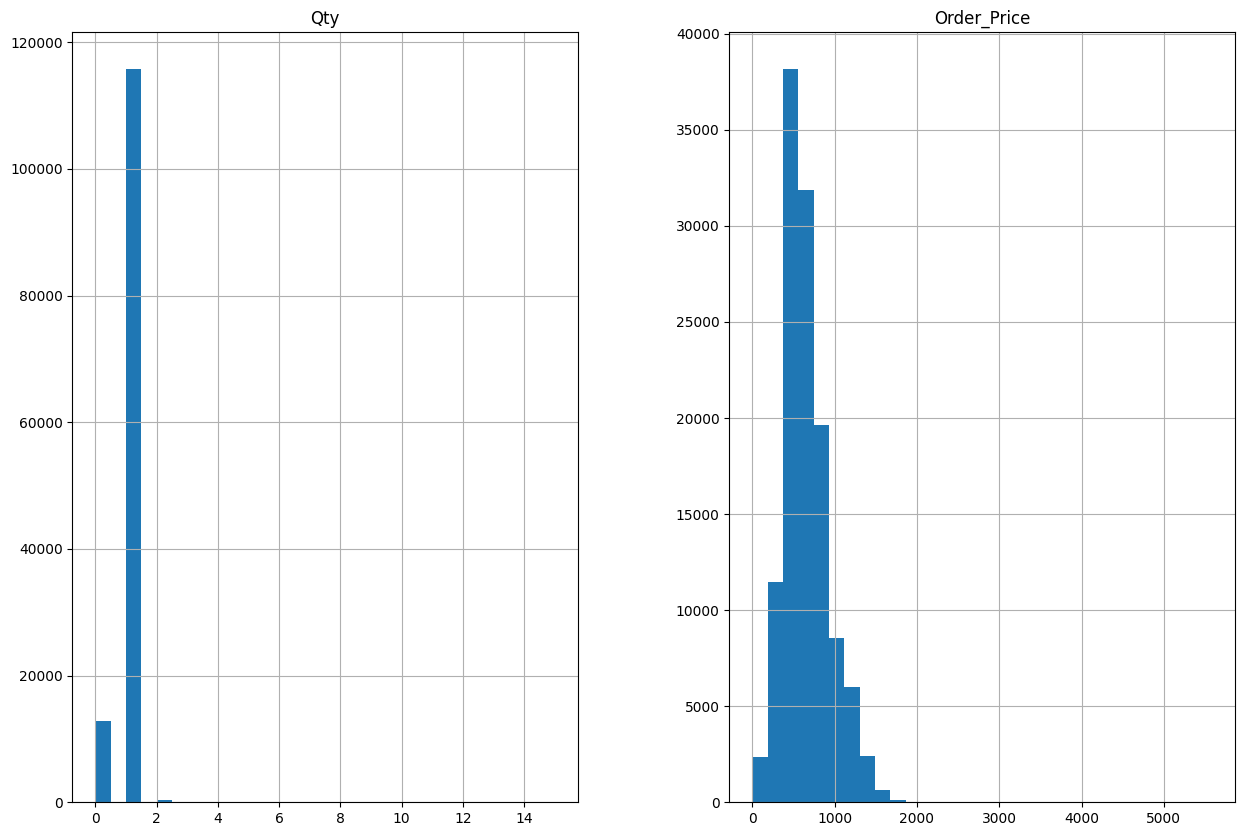

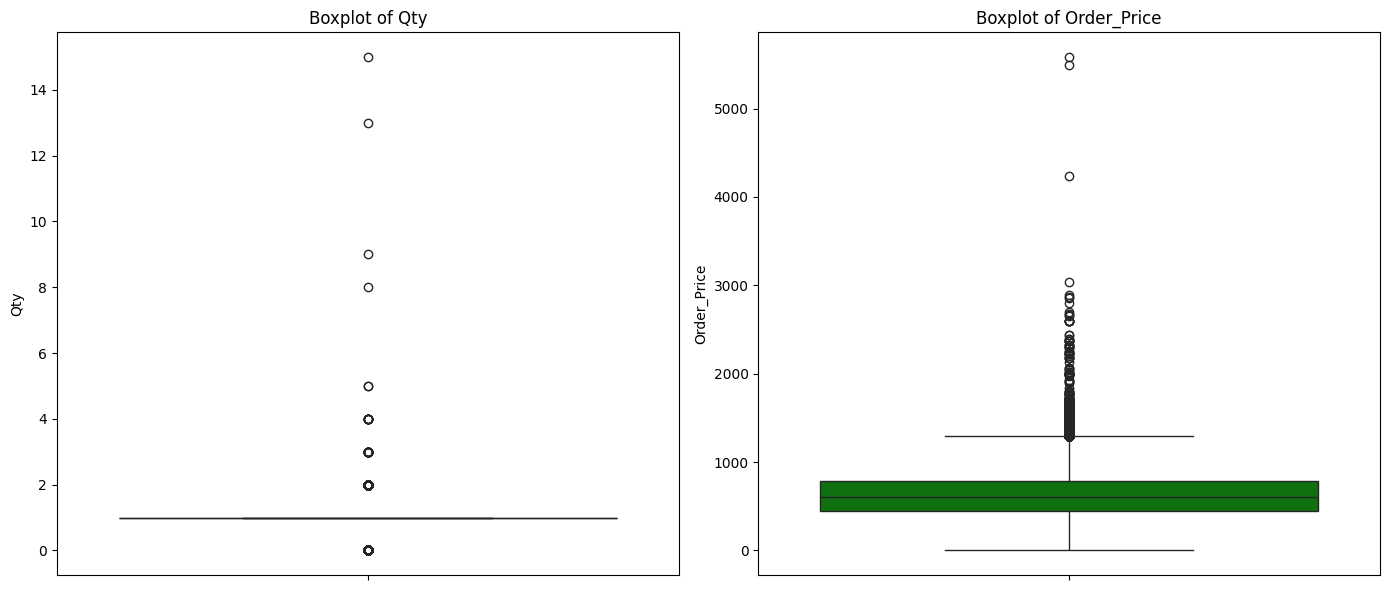

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List kolom numerikal di df_selected
nums = ['Qty', 'Order_Price']

# Membuat histogram untuk setiap kolom numerik
dfnew[nums].hist(figsize=(15, 10), bins=30)
plt.show()

# Membuat boxplot dengan loop untuk setiap kolom numerik
plt.figure(figsize=(14, 6))
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)  # Mengatur subplot untuk tiap kolom
    sns.boxplot(y=dfnew[nums[i]],color='green', orient='v')
    plt.title(f'Boxplot of {nums[i]}')

plt.tight_layout()
plt.show()


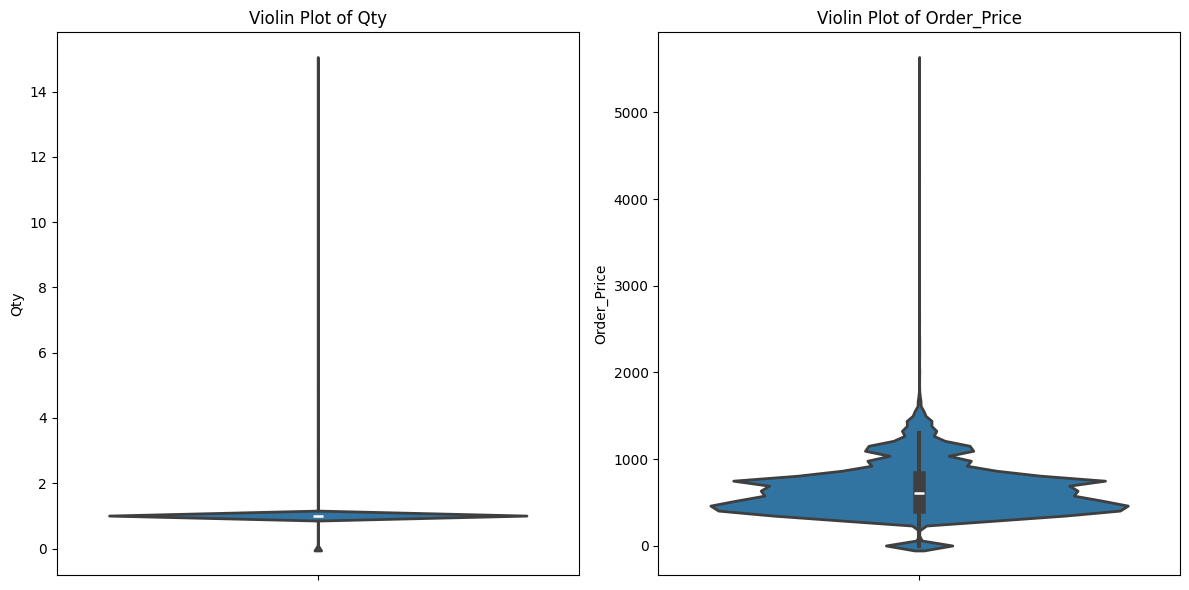

In [ ]:
# Membuat figure untuk violin plot setiap kolom numerik
plt.figure(figsize=(6 * len(nums), 6))  # Memperbesar width untuk setiap kolom numerik

for i in range(len(nums)):
    plt.subplot(1, len(nums), i + 1)  # Mengatur posisi subplot
    sns.violinplot(data=dfnew, y=nums[i], linewidth=2, orient='v')
    plt.title(f'Violin Plot of {nums[i]}')
    plt.ylabel(nums[i])

plt.tight_layout()
plt.show()


Berdasarkan hasil boxplot dan violinplot terlihat bahwa distribusi nilai pada kolom Qty/kuantitas adalah cenderung berkumpul di nilai 1, artinya jumlah barang yang dipesan dan dilakukan pengiriman hampir seluruhnya 1 pcs. Kemudian untuk distribusi nilai untuk amount/harga pesan cenderung berkumpul di nilai 1000-an dan bentuk distribusinya skewed ke kanan yang menandakan bahwa nilai rata-rata pada kolom lebih besar dari median.

Langkah Data Preprocessing yang direkomendasikan adalah **pengecekan outlier** pada kolom Qty dan Order_Price karena outlier bisa menyebabkan bias dalam model, jadi pertimbangkan untuk menghilangkan, mengurangi dampaknya, atau melakukan scaling. Kemudian **transformasi data**, yaitu pertimbangkan transformasi log atau box-cox pada Order_Price untuk mengurangi skewness jika distribusinya mengganggu kinerja model nantinya. Terakhir, **melakukan handling nilai 0 di Qty**, teliti apakah Qty dengan nilai 0 memang valid atau merupakan kesalahan data, karena ini bisa mengindikasikan pesanan kosong atau kesalahan input.

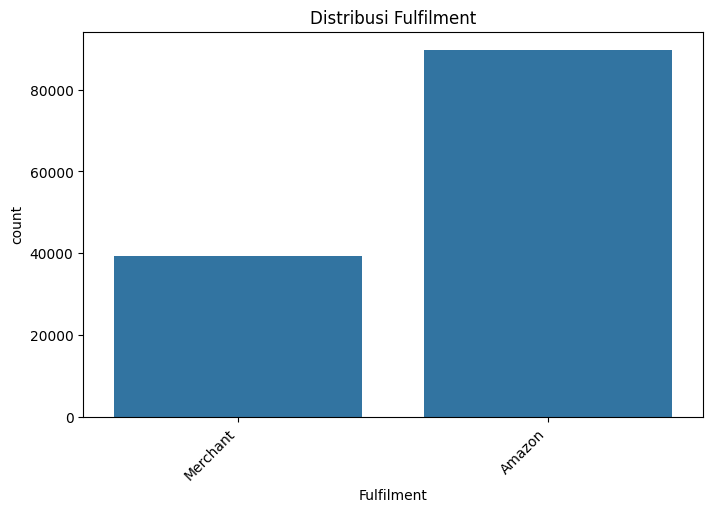

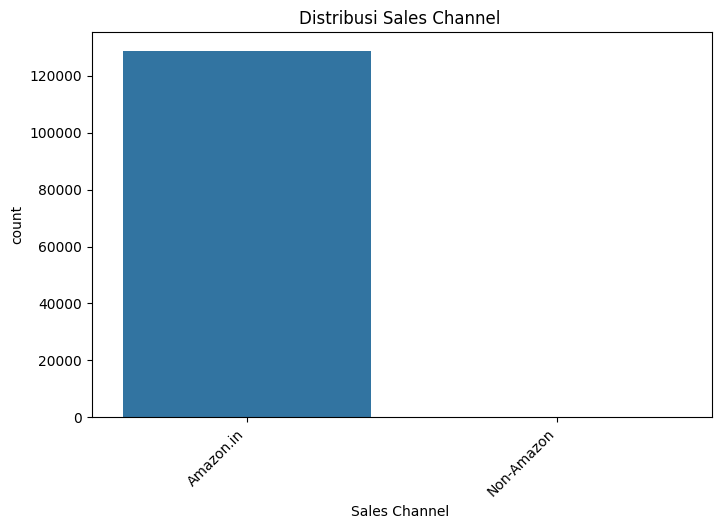

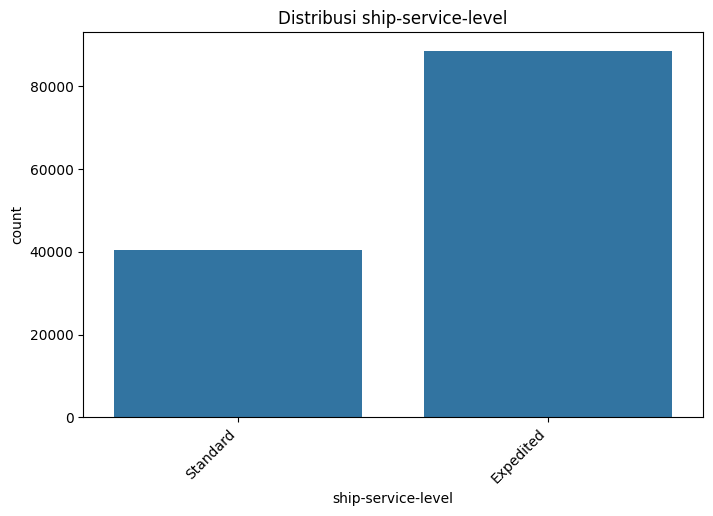

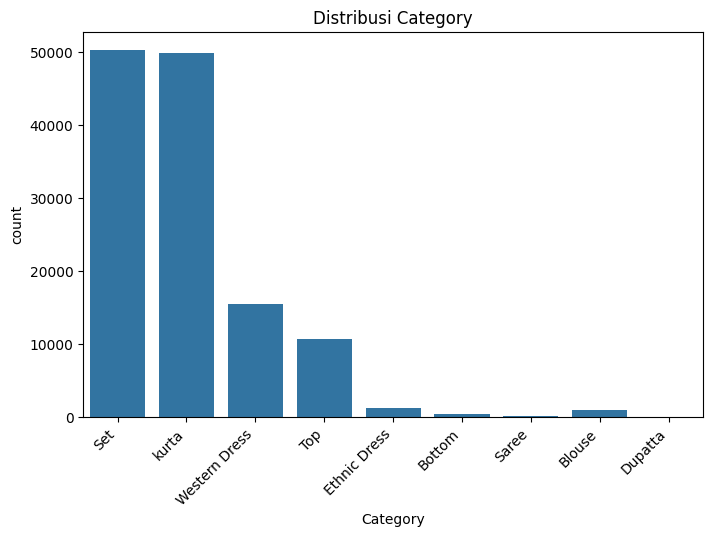

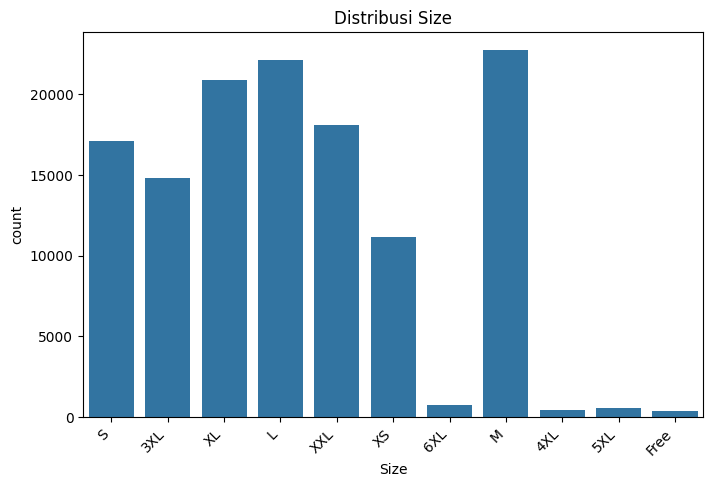

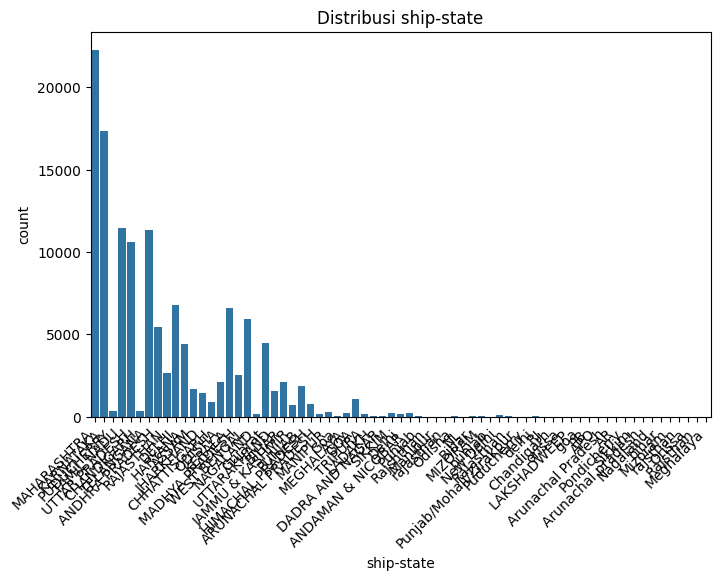

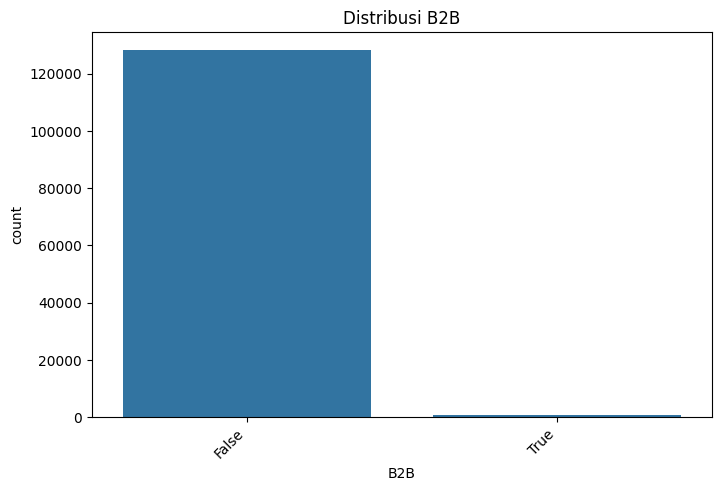

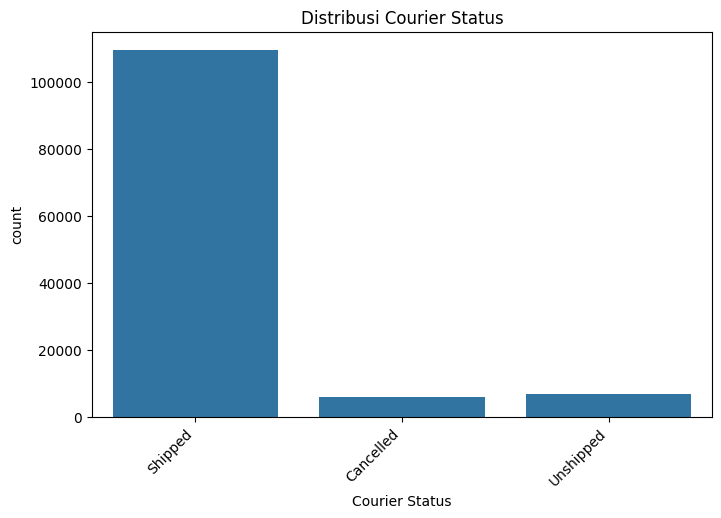

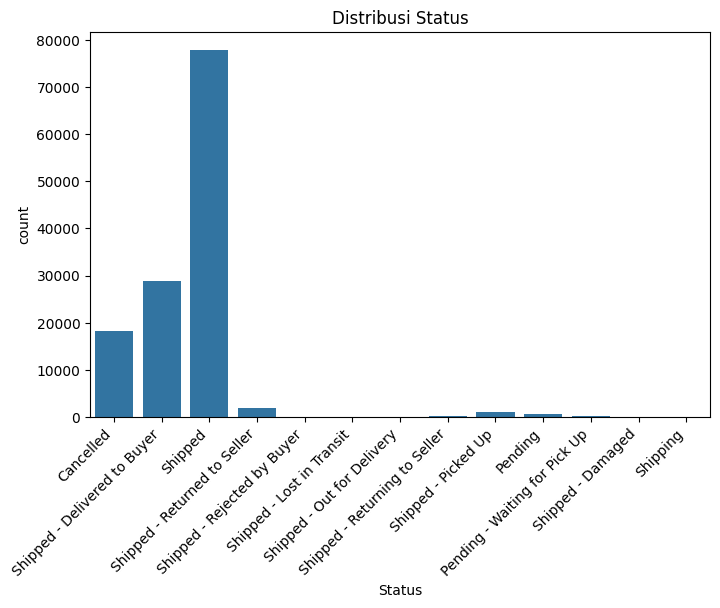

In [ ]:
# Visualisasi untuk kolom kategorikal
for col in cats:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dfnew, x=col)  # Mengurutkan berdasarkan frekuensi
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
# Menghitung value counts untuk kolom 'ship-city'
ship_city_counts = dfnew['ship-state'].value_counts()
ship_city_counts

,count
ship-state,
MAHARASHTRA,22260
KARNATAKA,17326
TAMIL NADU,11483
TELANGANA,11330
UTTAR PRADESH,10638
...,...
Mizoram,1
rajsthan,1
Punjab/Mohali/Zirakpur,1


In [ ]:
dfnew['Status'].value_counts()

,count
Status,
Shipped,77804
Shipped - Delivered to Buyer,28769
Cancelled,18332
Shipped - Returned to Seller,1953
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


Untuk data kategorikal, kesimpulan yang dapat diambil adalah:
1. Proporsi pesanan yang dipenuhi langsung oleh Amazon lebih banyak dibandingkan merchant atau **tingkat fullfilment pesanan lebih dominan dipenuhi oleh Amazon.**
2. **Platform Amazon.in hampir mendominasi terhadap keseluruhan pesanan** dalam perusahaan. Ini bisa berarti bahwa produk yang dijual kemungkinan besar lebih dikenal atau lebih efektif dipasarkan melalui Amazon dibandingkan saluran lain.
3. **Sebagian besar transaksi adalah Business to Consumer (B2C)**, di mana perusahaan menjual produk langsung kepada konsumen akhir. Ini menunjukkan bahwa model bisnis yang diadopsi lebih fokus pada penjualan ritel kepada individu daripada menjual dalam jumlah besar kepada bisnis lain.
4. **Set dan Kurta** adalah dua kategori produk yang paling banyak dilakukan pemesanan.
5. **Status yang paling dominan adalah Shipped (77,804) dan Shipped - Delivered to Buyer (28,769), kemudian status Cancelled (18,332) juga cukup signifikan**, menunjukkan bahwa pembatalan adalah bagian yang tidak bisa diabaikan dalam alur pemesanan.
6. **Status mungkin kedepannya dapat dikelompokkan menjadi kategori yang lebih sederhana**: Delivered, Cancelled, Returned, Pending, dan Lost/Damaged. Hal ini akan membantu meningkatkan akurasi model, mempermudah analisis, dan dapat menyoroti permasalahan utama: Kategori seperti Returned atau Cancelled dapat menjadi fokus untuk menganalisis sebab-sebab utama kegagalan pengiriman atau kepuasan pelanggan.



**3. Multivariate Analysis**

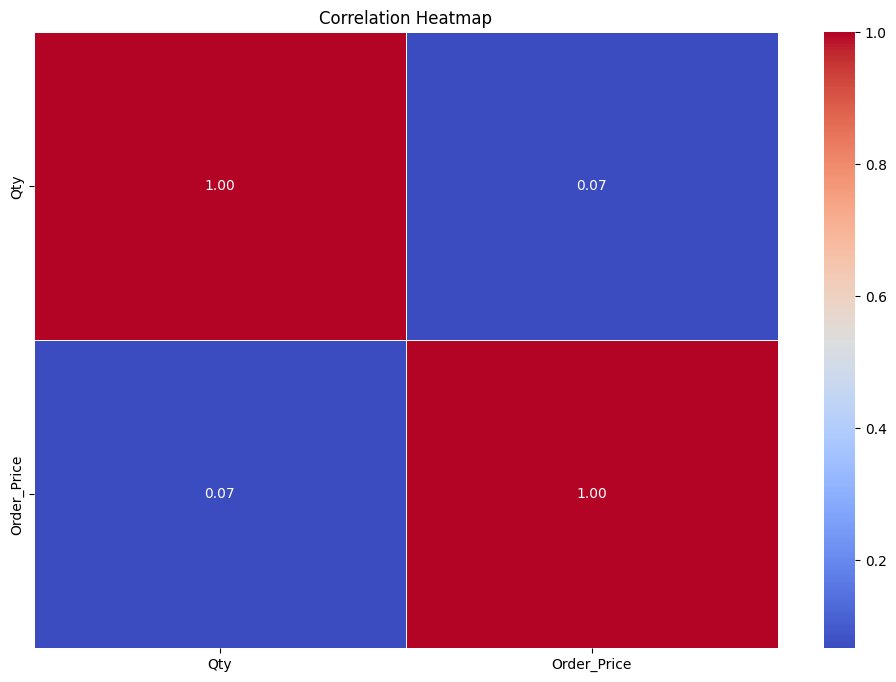

In [ ]:
# 1. Menghitung matriks korelasi untuk kolom numerik
correlation_matrix = dfnew[nums].corr()

# 2. Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

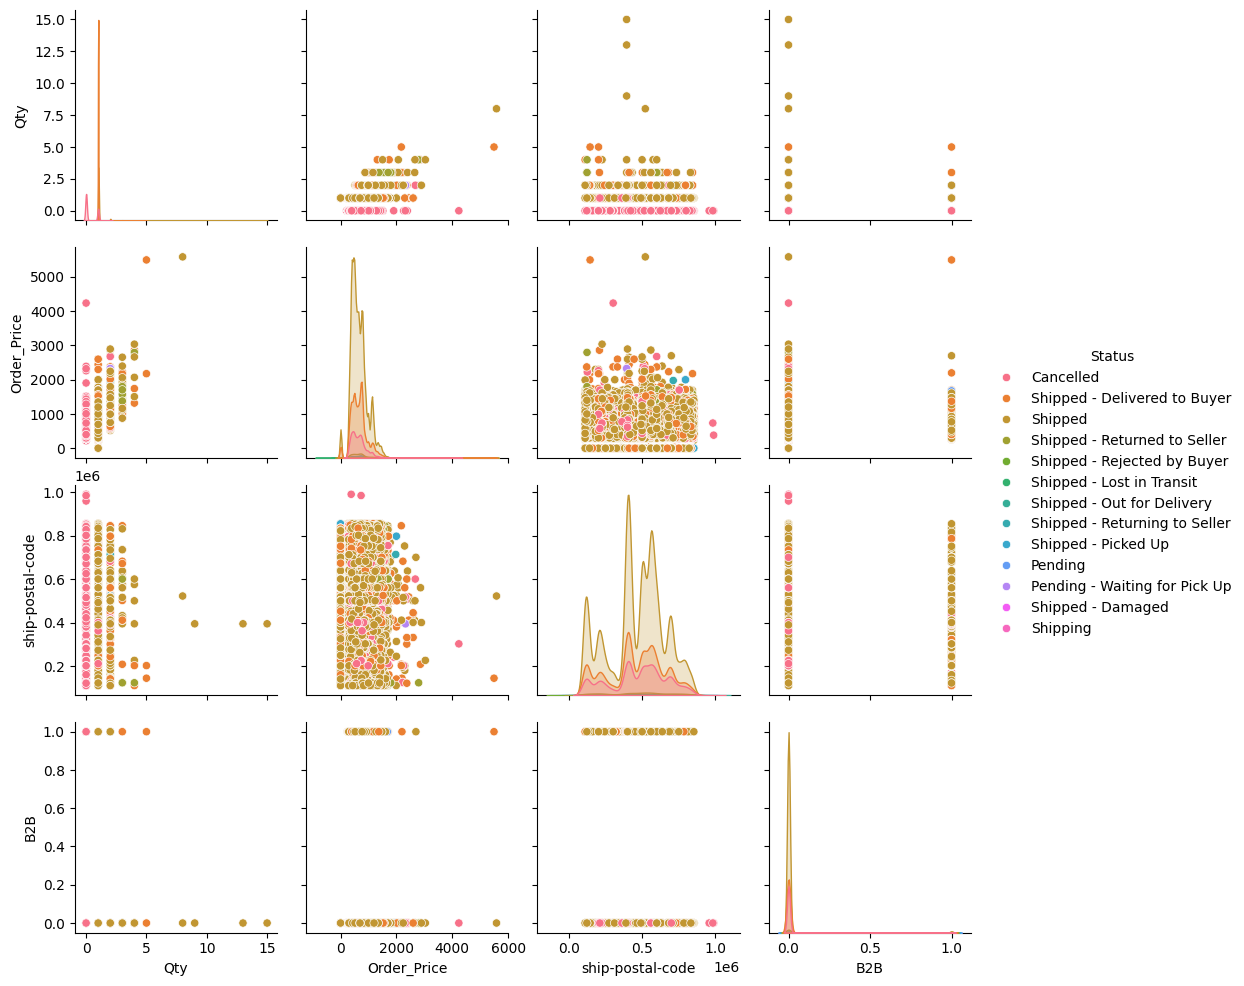

In [ ]:
sns.pairplot(dfnew, diag_kind='kde', hue='Status')

Melihat korelasi antar fitur kategorikal dan numerikal:

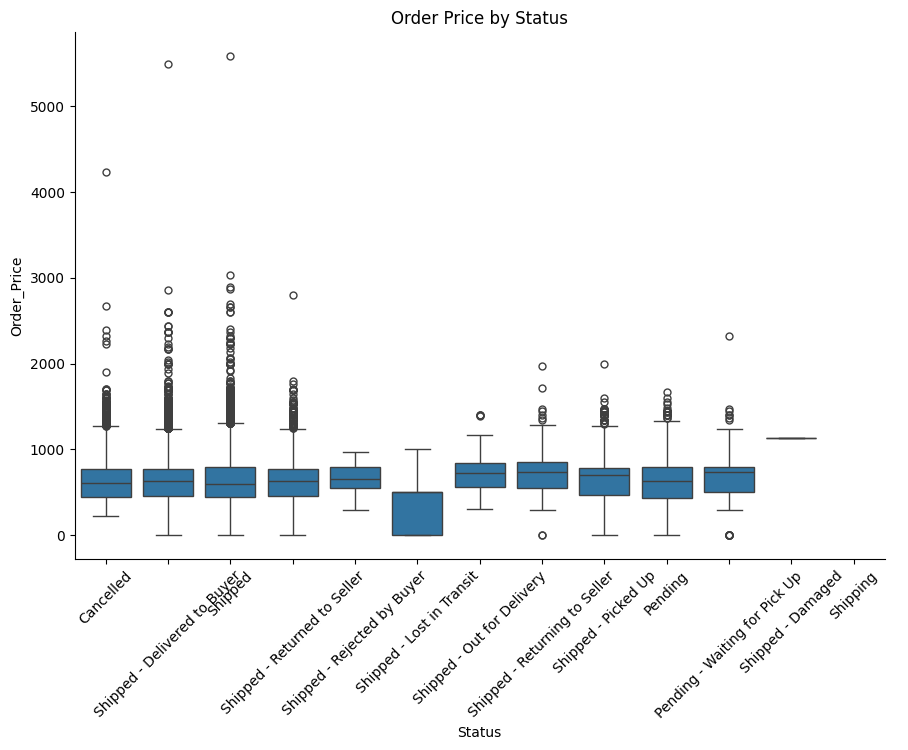

In [ ]:
sns.catplot(data=dfnew, x='Status', y='Order_Price', kind='box', height=6, aspect=1.5)
plt.xticks(rotation=45)  # Putar label x sebesar 45 derajat, bisa juga diubah ke 90 untuk lebih tegak
plt.title("Order Price by Status")  # Menambahkan judul untuk memperjelas plot
plt.show()

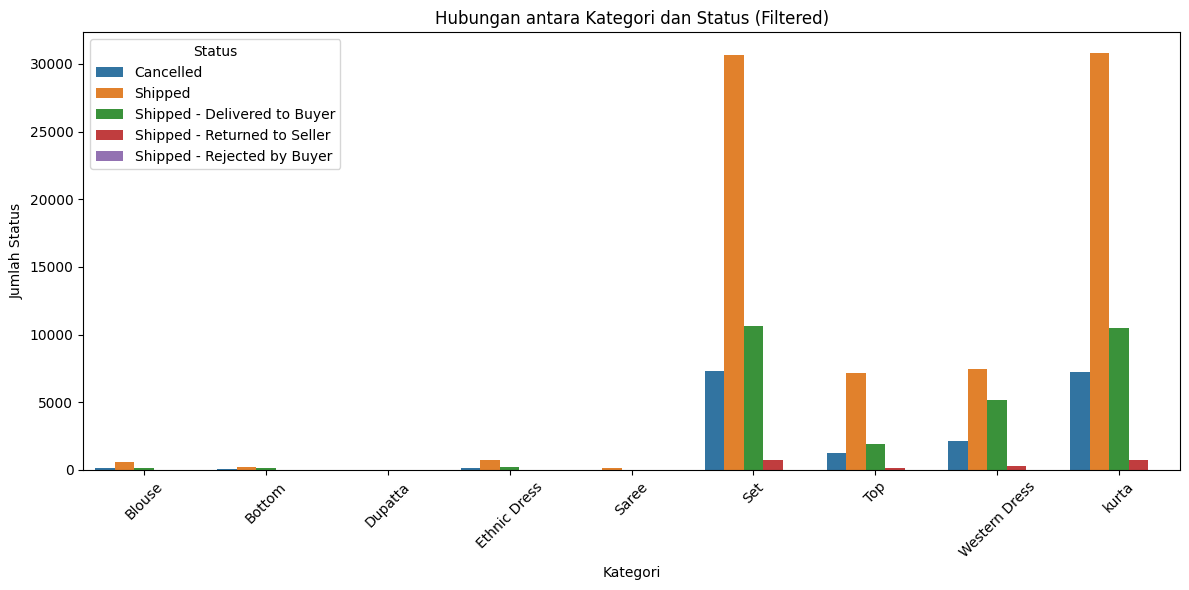

In [ ]:
# Daftar status yang ingin difilter
status_to_filter = [
    'Cancelled',
    'Shipped - Delivered to Buyer',
    'Shipped',
    'Shipped - Returned to Seller',
    'Shipped - Rejected by Buyer'
]

# Memfilter DataFrame untuk hanya menyertakan status yang relevan
filtered_df = dfnew[dfnew['Status'].isin(status_to_filter)]

# Menghitung jumlah status untuk setiap kategori
category_status_counts = filtered_df.groupby(['Category', 'Status']).size().reset_index(name='Count')

# Menggunakan seaborn untuk membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(data=category_status_counts, x='Category', y='Count', hue='Status')
plt.title('Hubungan antara Kategori dan Status (Filtered)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Status')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

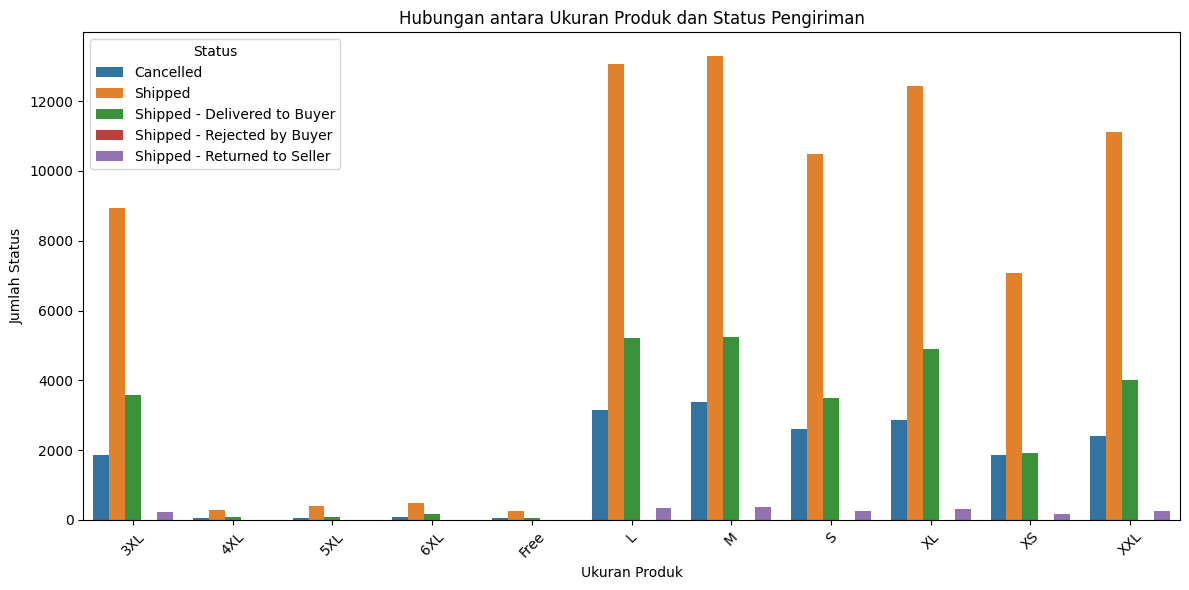

In [ ]:
# Daftar status yang ingin difilter
status_to_filter = [
    'Cancelled',
    'Shipped - Delivered to Buyer',
    'Shipped',
    'Shipped - Returned to Seller',
    'Shipped - Rejected by Buyer'
]

# Memfilter DataFrame untuk hanya menyertakan status yang relevan
filtered_df = dfnew[dfnew['Status'].isin(status_to_filter)]

# Menghitung jumlah status untuk setiap ukuran produk
size_status_counts = filtered_df.groupby(['Size', 'Status']).size().reset_index(name='Count')

# Menggunakan seaborn untuk membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(data=size_status_counts, x='Size', y='Count', hue='Status')
plt.title('Hubungan antara Ukuran Produk dan Status Pengiriman')
plt.xlabel('Ukuran Produk')
plt.ylabel('Jumlah Status')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengasumsikan Anda sudah memuat dataset ke dalam DataFrame bernama df
# df = pd.read_csv('path_to_your_file.csv')  # Ganti dengan path ke file Anda

# Daftar status yang ingin difilter (bisa disesuaikan sesuai kebutuhan)
status_to_filter = [
    'Shipped',
    'Shipped - Delivered to Buyer',
    'Shipped - Returned to Seller',
    'Shipped - Rejected by Buyer'
]

# Memfilter DataFrame untuk hanya menyertakan status yang relevan
filtered_df = dfnew[dfnew['Status'].isin(status_to_filter)]

# Menghitung jumlah status untuk setiap kategori produk berdasarkan ship service level
category_service_level_counts = filtered_df.groupby(['Category', 'ship-service-level', 'Status']).size().reset_index(name='Count')

# Mengurutkan hasil berdasarkan Count dari yang tertinggi ke terendah
category_service_level_counts = category_service_level_counts.sort_values(by='Count', ascending=False)

category_service_level_counts

,Category,ship-service-level,Status,Count
32,kurta,Expedited,Shipped,30378
17,Set,Expedited,Shipped,30223
19,Set,Standard,Shipped - Delivered to Buyer,10644
34,kurta,Standard,Shipped - Delivered to Buyer,10451
27,Western Dress,Expedited,Shipped,7405
22,Top,Expedited,Shipped,7081
29,Western Dress,Standard,Shipped - Delivered to Buyer,5190
24,Top,Standard,Shipped - Delivered to Buyer,1920
21,Set,Standard,Shipped - Returned to Seller,766
9,Ethnic Dress,Expedited,Shipped,742


Secara keseluruhan korelasi yang daoat dilihat yaitu korelasi sempurna yaitu ketika Qty Sold naik maka order_price juga naik yang menunjukkan bucket size harga tidak mengalami penurunan

Berdasarkan status paket:

1. **`Cancelled`**:
   - Status ini menunjukkan bahwa pesanan dibatalkan. Dalam scatterplot, `Cancelled` tersebar di berbagai nilai `Order_Price` dan `Qty`, tetapi bisa memiliki persebaran yang lebih rendah di kolom `Qty`, yang menunjukkan pesanan dengan jumlah item kecil. Ini mungkin karena pelanggan atau sistem membatalkan pesanan dengan jumlah kecil.
   
2. **`Shipped - Delivered to Buyer`**:
   - Status ini menunjukkan pesanan yang berhasil dikirim dan diterima oleh pembeli. Jika status ini memiliki persebaran yang lebih luas di nilai `Order_Price` dan `Qty`, ini mengindikasikan bahwa pesanan yang dikirim dan diterima oleh pembeli bisa berupa pesanan kecil maupun besar. Hal ini menunjukkan kelancaran transaksi di berbagai kisaran harga dan jumlah.
   
3. **`Shipped - Returned to Seller`** dan **`Shipped - Rejected by Buyer`**:
   - Kedua status ini terkait dengan pesanan yang tidak berhasil diterima oleh pembeli dan dikembalikan ke penjual, baik karena pengembalian sukarela atau penolakan. Biasanya, pesanan dengan status ini mungkin memiliki `Order_Price` yang lebih tinggi atau `Qty` yang berbeda dibanding pesanan yang berhasil diterima. Mungkin pembeli lebih cenderung mengembalikan barang dengan nilai atau jumlah yang lebih tinggi.
   
4. **`Shipped - Lost in Transit`**:
   - Ini adalah status untuk pesanan yang hilang selama pengiriman. Meskipun tidak terlihat jelas dalam scatterplot, biasanya status ini jarang muncul, dan dapat menjadi indikasi tantangan logistik yang perlu dianalisis lebih lanjut, terutama jika terjadi pada pesanan dengan `Order_Price` atau `Qty` tertentu.

5. **`Shipped - Out for Delivery` dan `Shipped - Returning to Seller`**:
   - Kedua status ini menunjukkan pesanan yang masih dalam perjalanan, baik menuju pembeli atau dikembalikan ke penjual. Status ini mungkin tidak memiliki banyak variasi dalam `Order_Price` atau `Qty`, karena status pengiriman ini mungkin relatif sama di berbagai jenis pesanan.

6. **`Pending`, `Pending - Waiting for Pick Up`**:
   - Status `Pending` menunjukkan pesanan yang belum diproses atau menunggu tahap selanjutnya, sementara `Pending - Waiting for Pick Up` mungkin menandakan pesanan yang sudah siap tetapi menunggu diambil oleh pengirim atau pembeli. Scatterplot menunjukkan bahwa banyak pesanan `Pending` berada pada kisaran `Order_Price` yang lebih rendah, yang bisa menunjukkan bahwa pesanan yang masih menunggu biasanya adalah pesanan dengan harga yang tidak terlalu tinggi.
   
7. **`Shipping`**:
   - Status `Shipping` menunjukkan pesanan dalam proses pengiriman. Pesanan dalam status ini kemungkinan besar tersebar di berbagai nilai `Order_Price` dan `Qty`, yang menunjukkan bahwa beragam jenis pesanan dapat berada dalam tahap pengiriman, baik yang bernilai rendah maupun tinggi.

8. **`Shipped - Damaged`**:
   - Status ini menunjukkan pesanan yang mengalami kerusakan selama pengiriman. Scatterplot mungkin menunjukkan bahwa pesanan ini memiliki nilai `Order_Price` atau `Qty` tertentu yang berbeda dari pesanan lainnya. Kerusakan selama pengiriman bisa terjadi pada pesanan yang bernilai tinggi atau barang yang mudah rusak.

### Kesimpulan Umum
Status pesanan dalam scatterplot matrix ini memberi gambaran mengenai kondisi atau tahapan yang berbeda dalam proses pemesanan dan pengiriman. Distribusi status dalam kaitannya dengan variabel seperti `Order_Price` dan `Qty` dapat membantu kita mengidentifikasi pola, misalnya:
- Status yang cenderung muncul pada pesanan bernilai tinggi (misalnya, pengembalian atau kerusakan).
- Status yang sering muncul pada pesanan dengan jumlah item kecil (misalnya, pesanan `Pending` atau `Cancelled`).
- Status `Shipped - Delivered to Buyer` yang menunjukkan bahwa pesanan berhasil dikirim dan diterima di berbagai kisaran harga dan jumlah.


Dari visualisasi boxplot yang kamu tampilkan, berikut adalah beberapa analisis dan insight yang dapat diperoleh mengenai distribusi `Order_Price` berdasarkan `Status`:

1. **Median Order Price**:
   - Boxplot ini menunjukkan bahwa median `Order_Price` untuk hampir semua status relatif konsisten, dengan sebagian besar berada di kisaran nilai yang serupa (sekitar beberapa ratus hingga di bawah seribu). Ini mengindikasikan bahwa rentang harga pesanan tidak banyak berbeda di antara status yang berbeda.

2. **Variabilitas (IQR) dan Persebaran Data**:
   - **Rentang Antar-Kuartil (IQR)**: Beberapa status memiliki IQR yang lebih lebar, seperti `Shipped - Returned to Seller` dan `Shipped - Out for Delivery`, yang menunjukkan variasi yang lebih besar dalam harga pesanan di status ini. Status `Shipped - Rejected by Buyer` memiliki IQR yang paling sempit, menunjukkan variabilitas harga yang lebih rendah di antara pesanan dengan status ini.
   - **Ekstremitas dan Outlier**: Hampir semua status memiliki outlier pada `Order_Price` yang relatif tinggi. Outlier ini mungkin adalah pesanan bernilai tinggi yang jarang terjadi, seperti pesanan besar atau barang mahal. Misalnya, status `Cancelled`, `Shipped - Delivered to Buyer`, dan `Shipped - Returned to Seller` memiliki beberapa outlier yang jauh di atas nilai maksimum untuk sebagian besar pesanan lainnya.

3. **Perbedaan di Antara Status**:
   - **Status `Shipped - Lost in Transit`**: Status ini memiliki median `Order_Price` yang lebih rendah dibanding status lainnya, dengan IQR yang sempit. Ini mungkin menunjukkan bahwa pesanan yang hilang dalam pengiriman cenderung memiliki nilai yang lebih rendah.
   - **Status `Shipped - Damaged`**: Ada data dengan `Order_Price` spesifik dan sempit (tidak ada persebaran yang terlihat), menunjukkan hanya ada sedikit atau satu pesanan yang masuk dalam kategori ini, atau data yang sangat konsisten untuk status ini.
   - **Status `Pending` dan `Pending - Waiting for Pick Up`**: Kedua status ini menunjukkan variasi yang lebih besar dalam `Order_Price`, tetapi dengan banyak outlier di rentang harga yang lebih tinggi. Ini mungkin menandakan pesanan yang masih menunggu proses atau pengambilan mencakup berbagai jenis produk, mulai dari yang murah hingga yang mahal.

4. **Insight untuk Pengambilan Keputusan**:
   - **Konsistensi di `Order_Price`**: Dengan distribusi harga pesanan yang relatif konsisten di sebagian besar status, ini menunjukkan bahwa berbagai tahap pesanan (seperti pengiriman, pengembalian, penolakan) cenderung terjadi pada kisaran harga yang mirip. Hal ini dapat berguna untuk memprediksi perilaku pesanan di masa mendatang.
   - **Pengelolaan Outlier**: Banyaknya outlier di berbagai status menunjukkan adanya beberapa pesanan bernilai tinggi. Ini mungkin perlu diperhatikan untuk kebijakan khusus, seperti asuransi atau penanganan ekstra untuk pesanan bernilai tinggi.
   - **Status Khusus**: Status seperti `Shipped - Lost in Transit` dan `Shipped - Damaged` memiliki pola yang unik dan mungkin memerlukan kebijakan khusus atau perhatian tambahan dalam proses pengiriman.

Secara keseluruhan, visualisasi ini menunjukkan bagaimana `Order_Price` terdistribusi di berbagai status pesanan dan memberikan gambaran tentang variasi harga di setiap tahap. Outlier yang muncul di beberapa status tertentu juga bisa menjadi fokus untuk perbaikan proses operasional.

Dari kedua visualisasi yang telah ditampilkan, berikut adalah beberapa rekomendasi yang bisa membantu mempermudah operasional bisnis dan meningkatkan efisiensi berdasarkan pola yang ditemukan dalam distribusi `Order_Price` dan status pesanan:

### 1. **Pengelolaan Pesanan Bernilai Tinggi (Outlier)**
   - **Rekomendasi**: Buatlah proses atau kebijakan khusus untuk pesanan dengan `Order_Price` yang tinggi. Pesanan ini memiliki risiko lebih besar jika terjadi masalah (seperti kerusakan atau hilang dalam pengiriman), sehingga bisa diberi perlakuan khusus, seperti asuransi tambahan, metode pengiriman yang lebih aman, atau bahkan konfirmasi ulang sebelum pengiriman.
   - **Manfaat**: Menurunkan risiko kerugian dari pesanan bernilai tinggi yang mengalami masalah, sekaligus meningkatkan kepuasan pelanggan karena pesanan mereka ditangani dengan lebih hati-hati.

### 2. **Optimalisasi Proses untuk Status `Pending` dan `Pending - Waiting for Pick Up`**
   - **Rekomendasi**: Percepat proses pemenuhan untuk pesanan dengan status `Pending`. Pesanan yang terlalu lama berada dalam status `Pending` atau `Waiting for Pick Up` dapat mengindikasikan keterlambatan dalam pemrosesan atau pengambilan.
   - **Manfaat**: Mengurangi waktu tunggu pelanggan dan menghindari kemungkinan pembatalan pesanan akibat waktu pemrosesan yang lama. Ini juga membantu meningkatkan perputaran stok, terutama untuk barang dengan nilai tinggi.

### 3. **Peningkatan Proses Pengembalian dan Penolakan Pesanan**
   - **Rekomendasi**: Dari visualisasi terlihat bahwa status `Shipped - Returned to Seller` dan `Shipped - Rejected by Buyer` memiliki variasi `Order_Price` yang cukup besar. Implementasikan analisis lebih lanjut untuk memahami alasan umum pengembalian atau penolakan, misalnya apakah karena kualitas produk, ekspektasi yang tidak terpenuhi, atau masalah logistik.
   - **Manfaat**: Memahami penyebab pengembalian dapat membantu merancang strategi untuk menguranginya, seperti meningkatkan kualitas deskripsi produk atau memberikan lebih banyak informasi tentang produk kepada pelanggan.

### 4. **Fokus pada Status dengan Risiko Tinggi (`Lost in Transit` dan `Damaged`)**
   - **Rekomendasi**: Perhatikan lebih detail pesanan dengan status `Shipped - Lost in Transit` dan `Shipped - Damaged`. Meskipun jumlahnya kecil, pesanan dengan status ini berdampak langsung pada reputasi perusahaan dan kepuasan pelanggan. Pertimbangkan kerja sama dengan penyedia logistik atau asuransi untuk memastikan barang bernilai tinggi mendapatkan perlindungan khusus.
   - **Manfaat**: Mengurangi jumlah pesanan yang hilang atau rusak akan meningkatkan kepercayaan pelanggan dan mengurangi klaim penggantian barang atau uang yang bisa merugikan bisnis.

### 5. **Analisis Lebih Mendalam terhadap Pola Pembatalan Pesanan**
   - **Rekomendasi**: Dari boxplot, pesanan dengan status `Cancelled` juga memiliki variasi `Order_Price` yang cukup besar, yang mengindikasikan pembatalan terjadi pada pesanan dengan berbagai kisaran harga. Analisis lebih lanjut tentang alasan pembatalan ini bisa membantu, misalnya, apakah terkait dengan waktu pemrosesan yang terlalu lama, stok tidak tersedia, atau faktor lain.
   - **Manfaat**: Mengurangi pembatalan pesanan akan meningkatkan penjualan dan memastikan pelanggan memiliki pengalaman yang lebih baik, terutama untuk pesanan dengan harga tinggi yang seharusnya dapat diselesaikan.

### 6. **Meningkatkan Proses Customer Service untuk Status Spesifik**
   - **Rekomendasi**: Buat proses layanan pelanggan yang lebih responsif untuk status yang sering mengalami kendala, seperti `Returned to Seller`, `Rejected by Buyer`, dan `Lost in Transit`. Ini bisa mencakup update status otomatis untuk pelanggan atau dukungan customer service yang proaktif.
   - **Manfaat**: Pelanggan akan merasa lebih diperhatikan dan di-support, sehingga meningkatkan loyalitas pelanggan dan mencegah komplain atau ulasan negatif.

### 7. **Monitoring dan Dashboard untuk Status dan Outlier**
   - **Rekomendasi**: Implementasikan dashboard pemantauan real-time yang menampilkan status pesanan serta pesanan yang masuk kategori outlier (harga atau kuantitas tinggi). Ini memudahkan tim operasional untuk segera menangani pesanan dengan risiko lebih tinggi dan memprioritaskan pesanan di status tertentu.
   - **Manfaat**: Mempercepat respons terhadap pesanan penting atau berisiko tinggi, serta meningkatkan efisiensi operasional melalui pemantauan yang terus-menerus.

### 8. **Penyesuaian Penawaran Produk Berdasarkan Status dan Harga**
   - **Rekomendasi**: Dari pola distribusi harga, sesuaikan penawaran atau promosi berdasarkan segmentasi harga dan status. Misalnya, untuk produk dengan `Order_Price` yang lebih rendah, promosikan metode pembelian impulsif; sedangkan untuk produk bernilai tinggi, tawarkan opsi pembayaran cicilan atau asuransi.
   - **Manfaat**: Meningkatkan konversi penjualan melalui pendekatan yang lebih tersegmentasi, sekaligus menurunkan kemungkinan pembatalan atau pengembalian pada produk tertentu.

### Rangkuman
Dengan rekomendasi ini, bisnis dapat meningkatkan efisiensi, mengurangi risiko, dan meningkatkan kepuasan pelanggan. Memanfaatkan data status dan harga pesanan untuk membuat proses yang lebih baik, serta pemantauan proaktif terhadap outlier, akan membantu dalam mengambil keputusan yang lebih tepat sasaran dalam operasional bisnis.

**4. Business Insight dan Rekomendasi Bisnis**

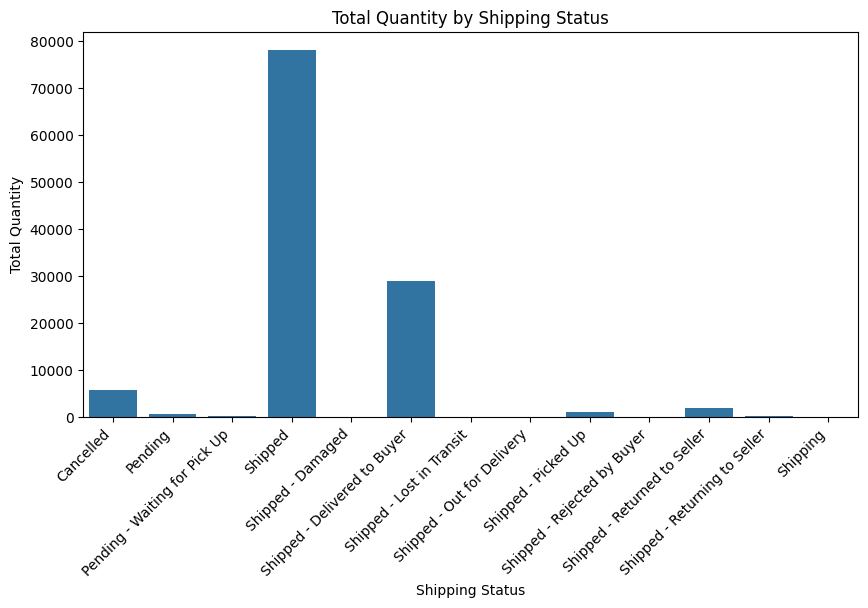

In [ ]:
# Menghitung total kuantitas untuk setiap status pengiriman
total_qty_by_status = dfnew.groupby('Status')['Qty'].sum().reset_index()

# Catplot untuk status pengiriman vs. kuantitas
plt.figure(figsize=(10, 5))
sns.barplot(x='Status', y='Qty', data=total_qty_by_status)
plt.title('Total Quantity by Shipping Status')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar tidak berhimpit
plt.xlabel('Shipping Status')
plt.ylabel('Total Quantity')
plt.show()

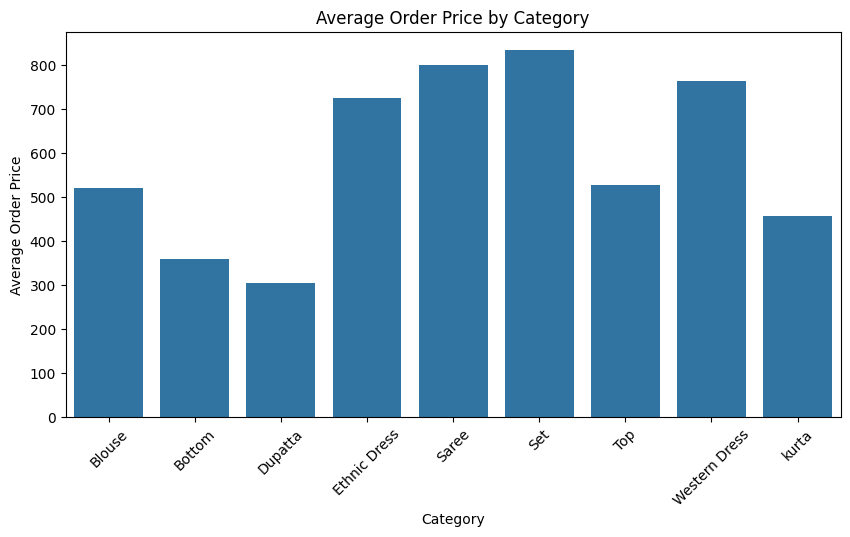

In [ ]:
# Kategori vs Order_Price
# Menghitung harga rata-rata untuk setiap kategori
average_price_by_category = dfnew.groupby('Category')['Order_Price'].mean().reset_index()

# Catplot untuk kategori vs. harga rata-rata
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Order_Price', data=average_price_by_category)
plt.title('Average Order Price by Category')
plt.xticks(rotation=45)  # Memutar label sumbu x agar tidak berhimpit
plt.xlabel('Category')
plt.ylabel('Average Order Price')
plt.show()

<ipython-input-47-f98d64751d12>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


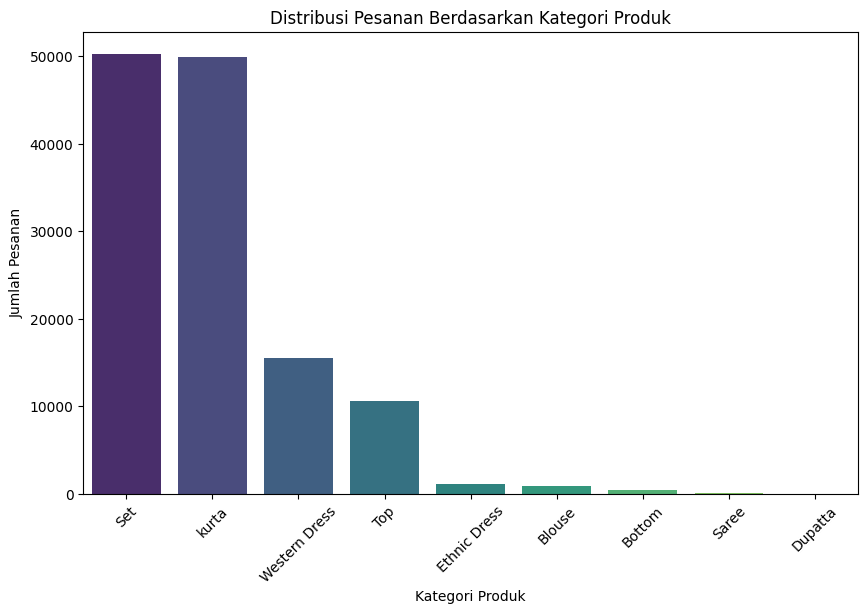

<ipython-input-47-f98d64751d12>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancelled_per_category.index, y=cancelled_per_category.values, palette='magma')


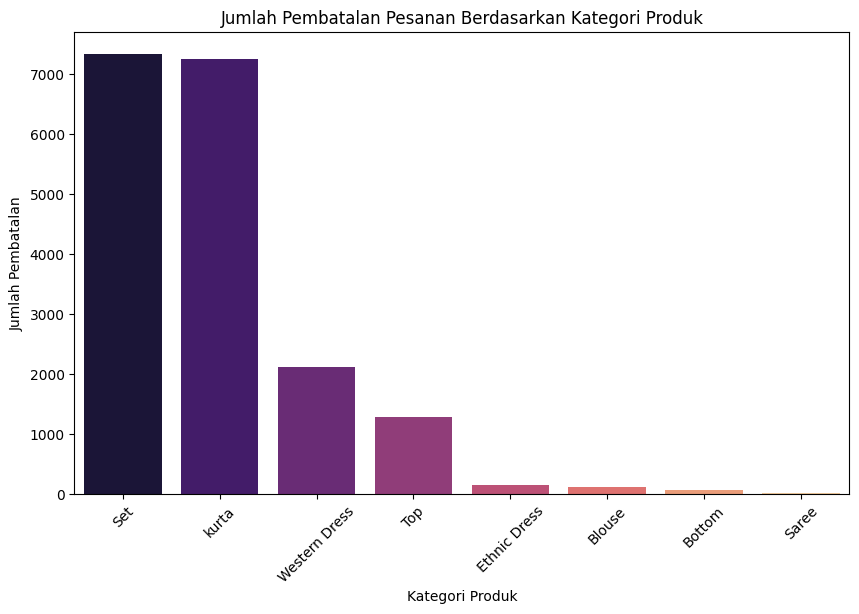

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah pesanan per kategori
category_counts = dfnew['Category'].value_counts()

# Plot bar chart untuk distribusi kategori
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribusi Pesanan Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

# Menghitung jumlah pembatalan per kategori
cancelled_per_category = dfnew[dfnew['Status'] == 'Cancelled']['Category'].value_counts()

# Plot bar chart untuk pesanan yang dibatalkan per kategori
plt.figure(figsize=(10, 6))
sns.barplot(x=cancelled_per_category.index, y=cancelled_per_category.values, palette='magma')
plt.title('Jumlah Pembatalan Pesanan Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembatalan')
plt.xticks(rotation=45)
plt.show()


<ipython-input-48-69598f63ebd2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette='coolwarm')


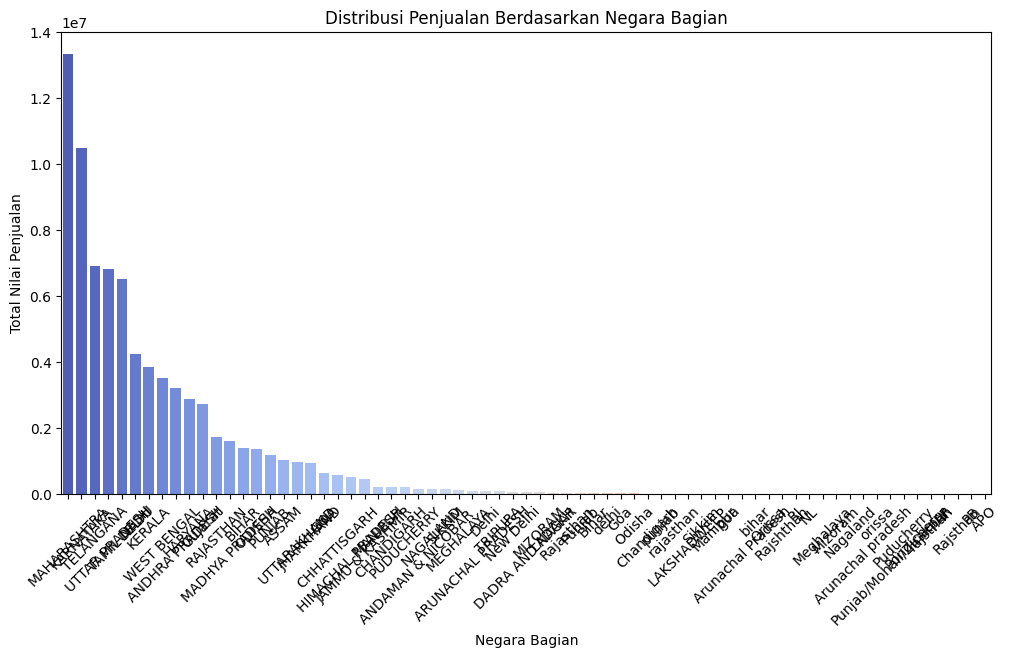

<ipython-input-48-69598f63ebd2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette='Blues')


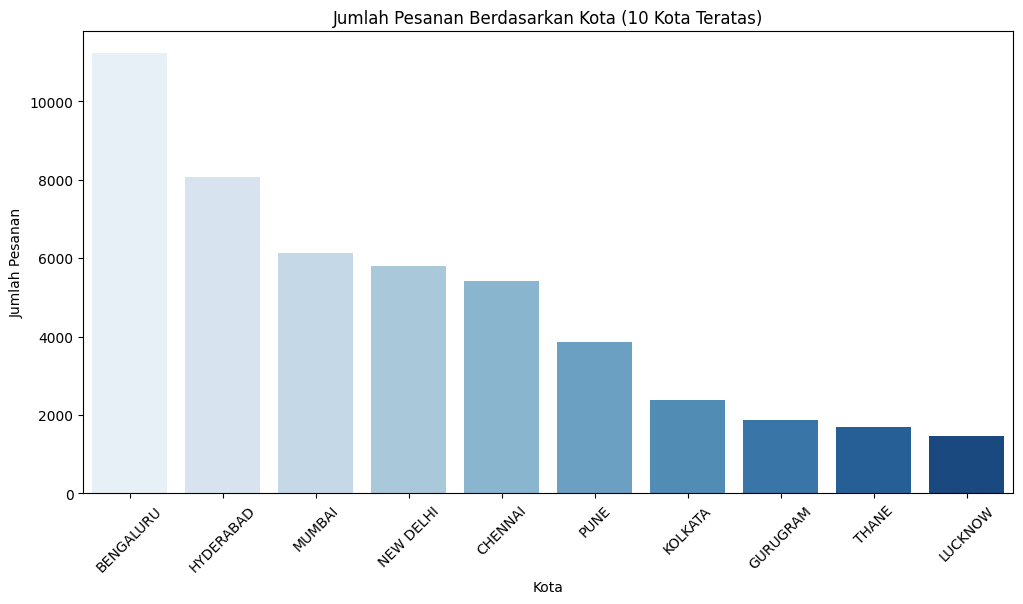

In [ ]:
# Menghitung jumlah pesanan dan total harga per negara bagian
state_sales = dfnew.groupby('ship-state')['Order_Price'].sum().sort_values(ascending=False)

# Plot bar chart untuk distribusi pesanan per negara bagian
plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.index, y=state_sales.values, palette='coolwarm')
plt.title('Distribusi Penjualan Berdasarkan Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Total Nilai Penjualan')
plt.xticks(rotation=45)
plt.show()

# Plot heatmap untuk jumlah pesanan per negara bagian (opsional jika data kota banyak)
city_sales = dfnew['ship-city'].value_counts().head(10)  # hanya menampilkan 10 kota teratas

plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, palette='Blues')
plt.title('Jumlah Pesanan Berdasarkan Kota (10 Kota Teratas)')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()
